## CS224 - Winter 2023
## PROGRAMMING ASSIGNMENT 1 - Principal Component Analysis (PCA)

### Due: February 13, 2023 @ 11:59pm PDT

**Submission Method**: Export the Jupyter notebook as **PDF** and submit the PDF file on **Gradescope**. Please **LINK** each question from the assignment in Gradescope to the location of its answer in your PDF. (For more details, see the Assignment Guidelines.)

**Maximum points**: 10

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: Shahriar M Sakib
  </br>

  <b>Student ID Number</b>:  862393922
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

<div style="padding: 15px; color: #8a6d3b; background-color: #fcf8e3; border: 1px solid #faebcc; border-radius: 5px;">
<b><font size=+2>Academic Integrity</font></b></br> 
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TA, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources. The UCR Academic Integrity policies are available at <a href="http://conduct.ucr.edu/policies/academicintegrity.html" target="_blank">http://conduct.ucr.edu/policies/academicintegrity.html</a>.
</div>

# Overview 
In this assignment, We will implement PCA, apply it to the [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset, and observe how the reconstruction changes as we change the number of principal components used.

For this assignment we will use the functionality of [Numpy](http://www.numpy.org/), and [Matplotlib](https://matplotlib.org/).

*   Before you start, make sure you have installed all those packages in your local Jupyter instance.
*   If you are asked to implement a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, **please just ASK**.
*   It's okay to use functions in `numpy.linalg` to calculate matrix decomposition (e.g., `la.eig()`, `la.svd()`), but using built-in functions like `sklearn.decomposition.PCA()` will **not** get you any points.


Please read **all** cells carefully and answer **all** parts (both text and missing code). You will need to complete all the code marked `TODO` and answer descriptive/derivation questions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# DO NOT REMOVE THE CODE ABOVE

## Question 1 [10 points]

**Preliminaries**

The [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

First, Let's import the images and vectorize each image in the dataset.

In [2]:
mnist = load_digits()
img1 = mnist.data
imgs = mnist.data

Compute the mean of the images and subtract out the mean.

In [3]:
mean = np.mean(imgs, axis=0)
imgs -= mean
#imgs = (imgs - np.mean(imgs)) / np.std(imgs)

Let us call each zero mean vectorized image to be $X$. For $N$ images, you have $X_1,X_2,\dots,X_N$. Compute $[X^\top X]= R$.

**(a) [2 points]** Perform a principal components analysis of $R = V\Lambda V^\top$.

In [4]:
# Compute the covariance matrix
R = np.dot(imgs.T, imgs)

# Perform eigendecomposition of R
eigenvalues, eigenvectors = np.linalg.eig(R)

**(b) [2 points]** Analyze the eigenvalues in $\Lambda$ and decide which eigenvalues to retain and which can be set to zero. 

* You may want to plot the eigenvalues, the fraction of variance explained, AIC, or BIC, and set a threshold.

In [5]:
# Sort eigenvalues in descending order
eigenvalues_sorted = np.argsort(eigenvalues)[::-1]

# Sort eigenvectors according to eigenvalues
V = eigenvectors[:, eigenvalues_sorted]

# Compute the diagonal matrix Λ
λ = np.diag(eigenvalues[eigenvalues_sorted])

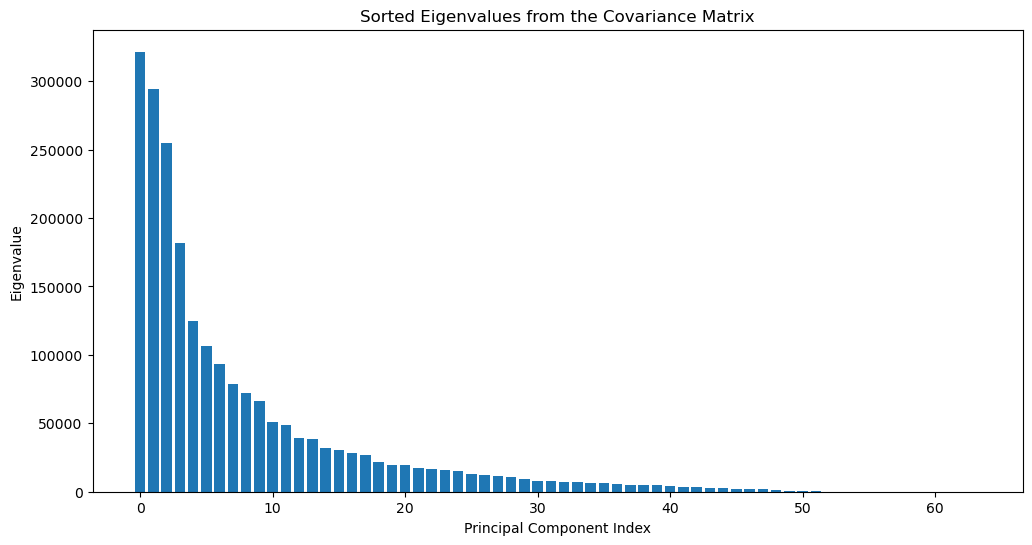

In [6]:

# Plot the sorted eigenvalues
plt.figure(figsize=(12,6))
plt.bar(range(len(eigenvalues)), eigenvalues[eigenvalues_sorted])
plt.ylabel("Eigenvalue")
plt.xlabel("Principal Component Index")
plt.title("Sorted Eigenvalues from the Covariance Matrix")
plt.show()

Analysing the eigenvalues in the above figure we can decide that which eigenvalues to retain and which can be set to zero.

**(c) [2 points]**  Reconstruct an approximation of each X after removing some of the small eigenvalues. (Display only a couple of the reconstructed **images**, and you will need to add the mean back.)

num of eigenvalues to keep: 54
 Removed Eigenvectors:  10


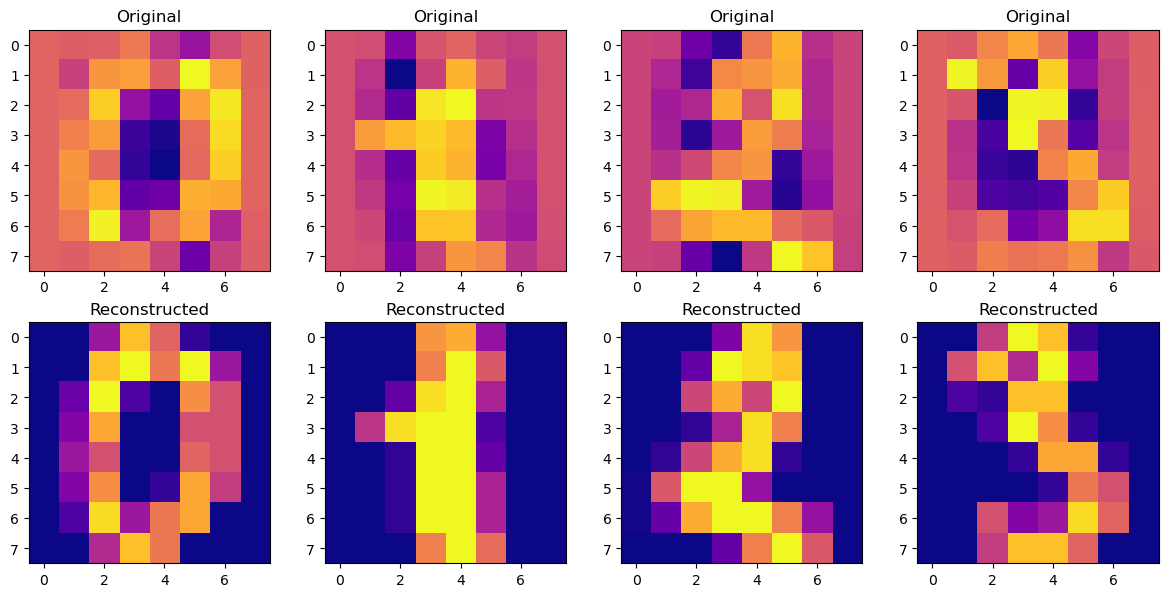

In [7]:
#Remove I smallest eigenvalues and corresponding eigenvectors
I=10
num_eigenvalues = len(λ)
num_eigenvalues_to_keep = num_eigenvalues - I
print("num of eigenvalues to keep:", num_eigenvalues_to_keep)
print(" Removed Eigenvectors: ", I)
V_reduced = V[:, :num_eigenvalues_to_keep]

#Reconstruct images using reduced eigenvectors and eigenvalues
transformed_imgs = np.dot(imgs , V_reduced)
reconstructed_imgs = np.dot(transformed_imgs, V_reduced.T)
reconstructed_imgs += mean
reconstructed_imgs = np.real(reconstructed_imgs)

#Display original and reconstructed images
img_no=4
fig, axes = plt.subplots(nrows=2, ncols=img_no, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < img_no:
        ax.imshow(imgs[i].reshape(8, 8), cmap='plasma')
        ax.set_title('Original')
    else:
        ax.imshow(reconstructed_imgs[i-4].reshape(8, 8), cmap='plasma')
        ax.set_title('Reconstructed')
plt.tight_layout()
plt.show()


**(d) [2 points]**  Compute the error between the reconstructed X and original image. (The mean of the original data should **not** be included in the error.)

In [8]:
#To compute the error between the reconstructed X and the original image, I am calculating the mean squared error (MSE)
mse1 = np.mean((img1 - reconstructed_imgs)**2)
print(" Mean squared error MSE: ", mse1)

 Mean squared error MSE:  41.28476930327068


**(e) [2 points]**  Analyze by choosing different numbers of eigenvalues to be zeroed out. Provide a short summary of your conclusions based on this analysis.

In [9]:
def Flexible_reconstruction(I, img_no):
    num_eigenvalues = len(λ)
    num_eigenvalues_to_keep = num_eigenvalues - I
    V_reduced = V[:, :num_eigenvalues_to_keep]

    #Reconstruct images using reduced eigenvectors and eigenvalues
    transformed_imgs = np.dot(imgs , V_reduced)
    reconstructed_imgs = np.dot(transformed_imgs, V_reduced.T)
    reconstructed_imgs += mean
    reconstructed_imgs = np.real(reconstructed_imgs)

    #Display original and reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=img_no, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < img_no:
            ax.imshow(imgs[i].reshape(8, 8), cmap='plasma')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_imgs[i-4].reshape(8, 8), cmap='plasma')
            ax.set_title('Reconstructed')
    plt.tight_layout()
    plt.show()
    mse = np.mean((img1 - reconstructed_imgs)**2)
    print(" Removed Eigenvectors: ", I)
    print(" num of eigenvalues to keep: ", num_eigenvalues_to_keep)
    print(" Mean squared error MSE: ", mse)
    
    
    result= {'Removed Eigenvectors':I, 'num of eigenvalues to keep':num_eigenvalues_to_keep, 'Mean squared error MSE': mse}
    return result 



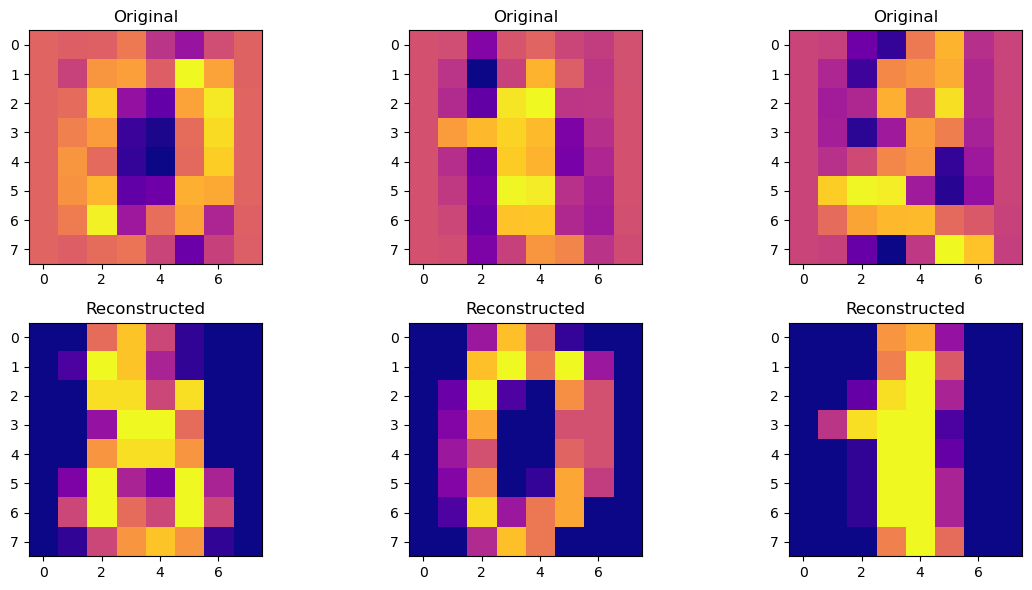

 Removed Eigenvectors:  5
 num of eigenvalues to keep:  59
 Mean squared error MSE:  41.28370754169258


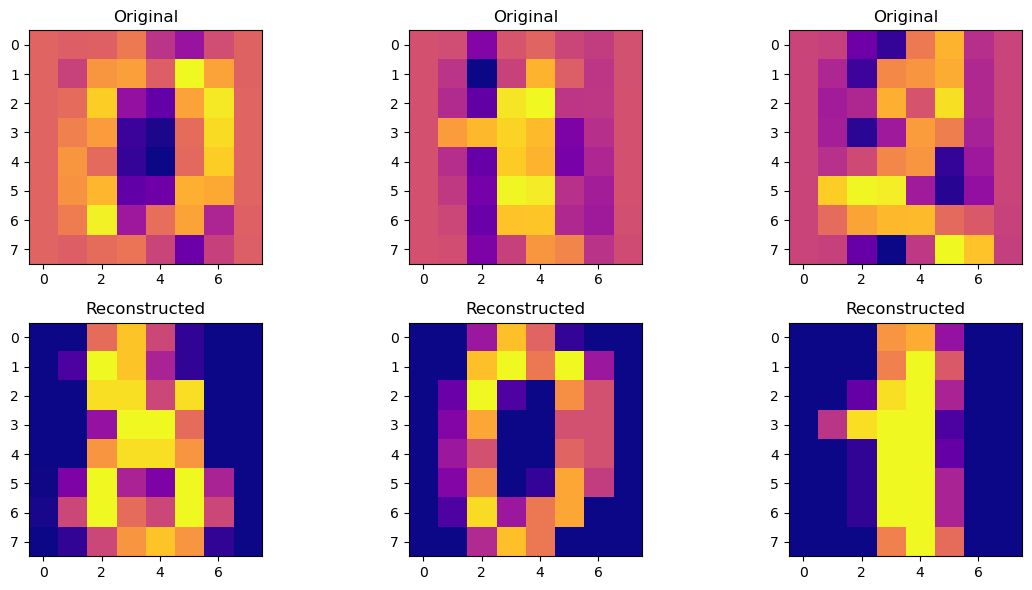

 Removed Eigenvectors:  10
 num of eigenvalues to keep:  54
 Mean squared error MSE:  41.28476930327068


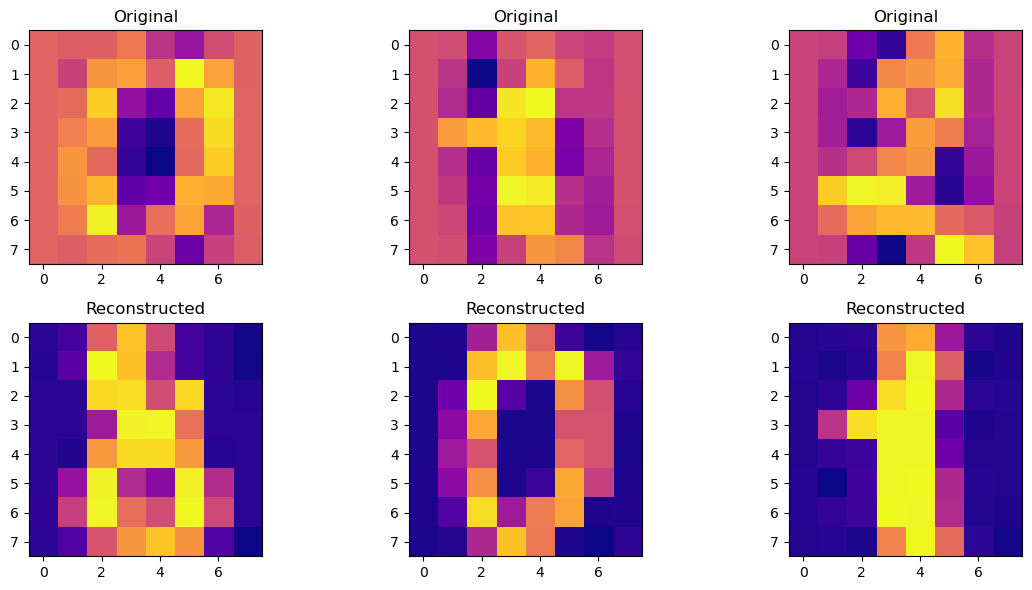

 Removed Eigenvectors:  20
 num of eigenvalues to keep:  44
 Mean squared error MSE:  41.38495778237771


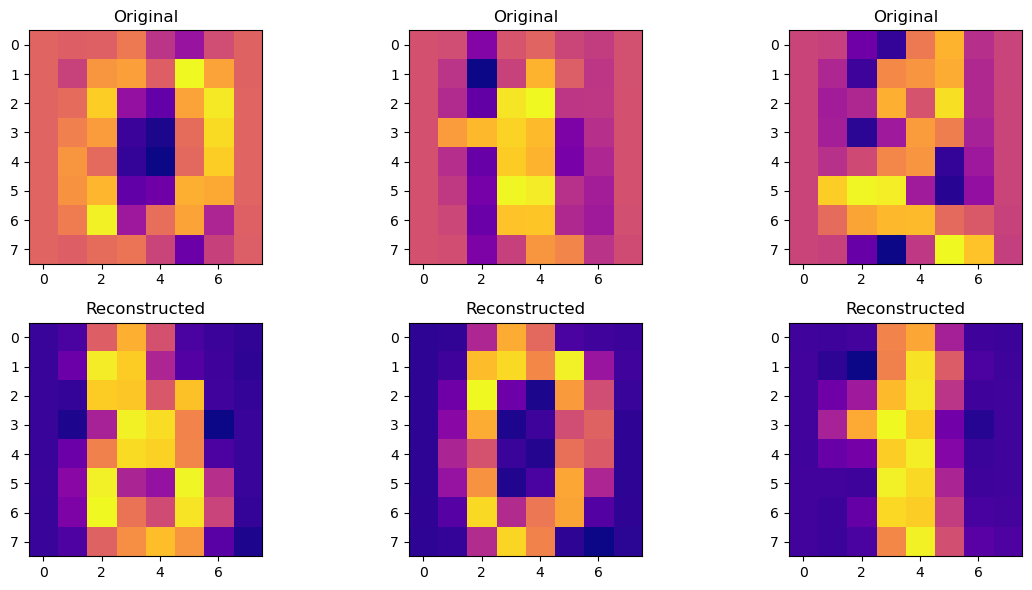

 Removed Eigenvectors:  30
 num of eigenvalues to keep:  34
 Mean squared error MSE:  41.79053936409281


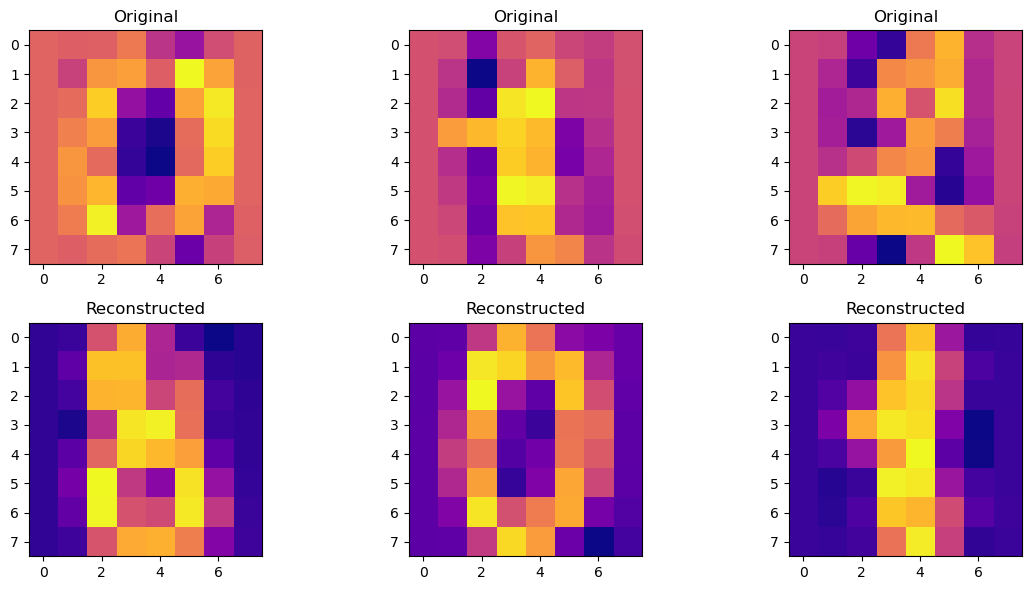

 Removed Eigenvectors:  40
 num of eigenvalues to keep:  24
 Mean squared error MSE:  42.67151697097408


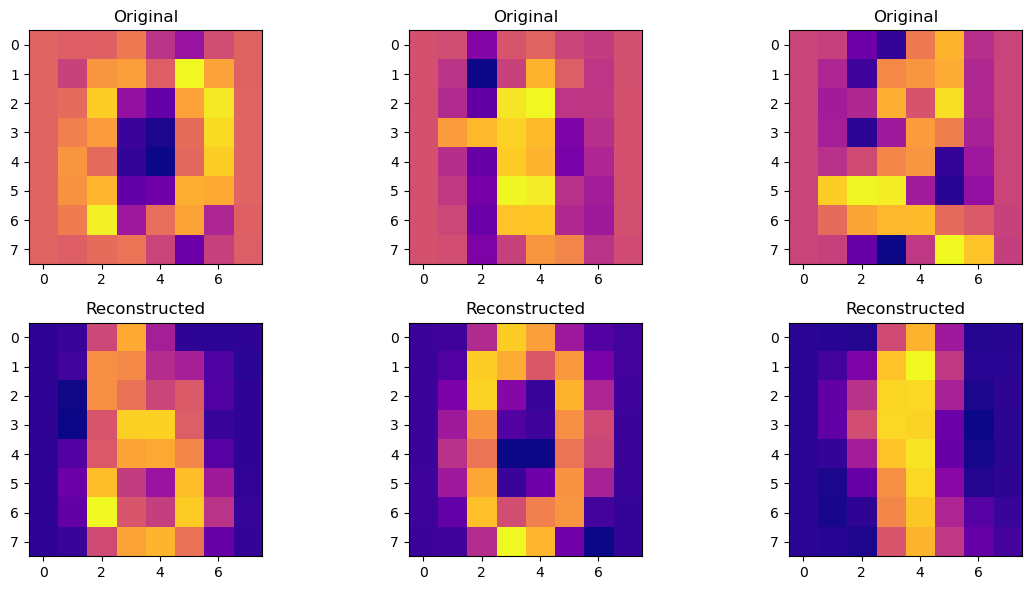

 Removed Eigenvectors:  50
 num of eigenvalues to keep:  14
 Mean squared error MSE:  44.65094146757757


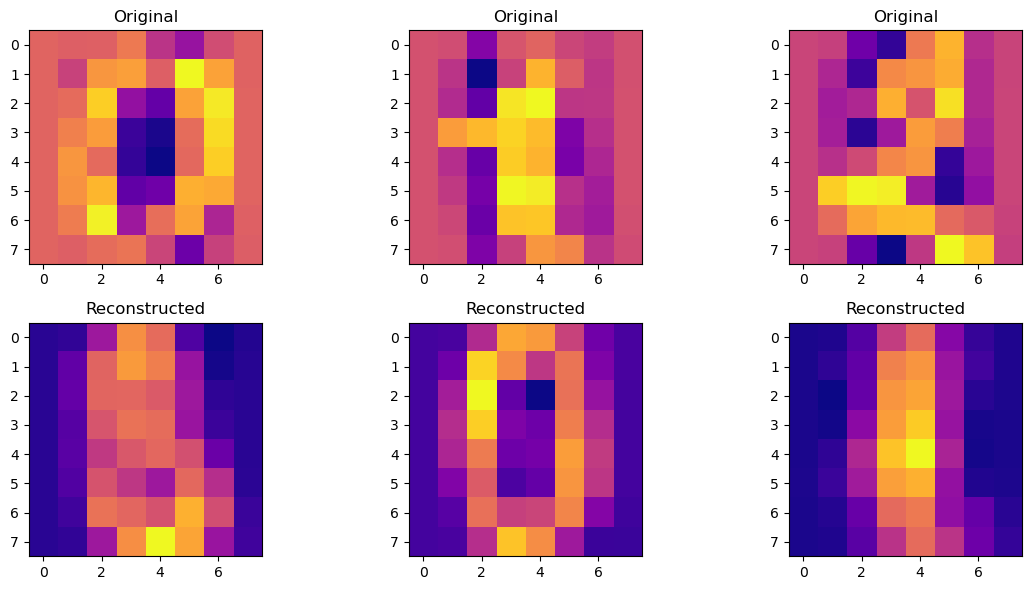

 Removed Eigenvectors:  60
 num of eigenvalues to keep:  4
 Mean squared error MSE:  50.911677184808816


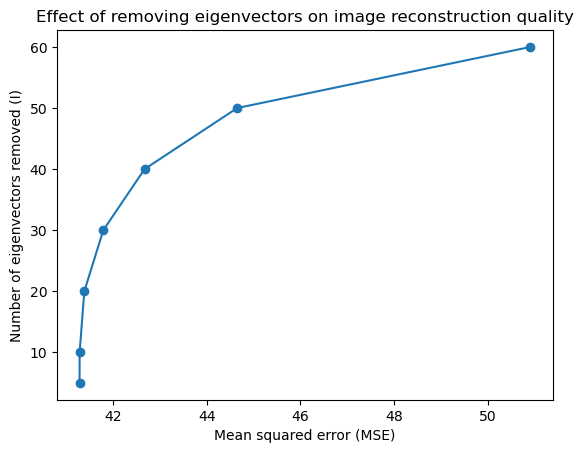

In [10]:
# Define the range of I values to test
I_values = [5,10, 20, 30, 40, 50, 60]
img_no = 3

# Initialize lists to store the MSE values and the number of eigenvalues kept for each I value
mse_values = []
num_eigenvalues = []

# Loop over the I values and run the function
for I in I_values:
    result = Flexible_reconstruction(I, img_no)
    mse = result['Mean squared error MSE']
    num_eig = result['num of eigenvalues to keep']
    mse_values.append(mse)
    num_eigenvalues.append(num_eig)

# Plot the MSE values for each I value
plt.plot(mse_values,I_values, 'o-')
plt.xlabel('Mean squared error (MSE)')
plt.ylabel('Number of eigenvectors removed (I)')
plt.title('Effect of removing eigenvectors on image reconstruction quality')
plt.show()

Removing a small number of eigenvectors has little effect on the reconstruction error, while removing larger numbers leads to higher errors.Specifically, when removing 5 or 10 eigenvectors, the MSE is around 41.3, which is relatively low. However, when removing 20, 30, 40, or 50 eigenvectors, the MSE increases to around 41.4, 41.8, 42.7, and 44.7, respectively. When removing 60 eigenvectors, the MSE increases substantially to 50.9.

Therefore, it seems that keeping around 55-60 eigenvalues out of the original 64 is a reasonable choice for balancing computational efficiency and reconstruction accuracy